#import directories

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
import pandas as pd
import numpy as np
from sklearn.utils import resample
import matplotlib.pyplot as plt


#load the iris dataset

In [ ]:
#load the iris dataset
data = load_iris()
X = data.data
y = data.target

In [ ]:
print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

# Split the dataset into training and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Intialize a decision Tree Classifier

In [ ]:
baseclassifier = DecisionTreeClassifier()

#Bagging with bootstrapping

In [ ]:
baggingmodel = BaggingClassifier(base_estimator=baseclassifier, n_estimators=10, max_samples=1.0, bootstrap=True, random_state=42)

#fit the model

In [ ]:
baggingmodel.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)

In [ ]:
y_pred = baggingmodel.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of bagging model with bootstrapping:", accuracy)

Accuracy of bagging model with bootstrapping: 1.0


#plotting

In [ ]:
iris = load_iris()
X1 = iris.data
y1 = iris.target
n_sample = X1.shape[0]

In [ ]:
print(X1)
print(y1)

In [ ]:
n_bootstraps = 1000
bootstrap_means = []

In [ ]:
for i in range(n_bootstraps):
  x_bootstrap,y_bootstrap = resample(X1, y1, n_samples=n_sample, replace=True)
  bootstrap_mean = np.mean(x_bootstrap[:, 0])
  bootstrap_means.append(bootstrap_mean)

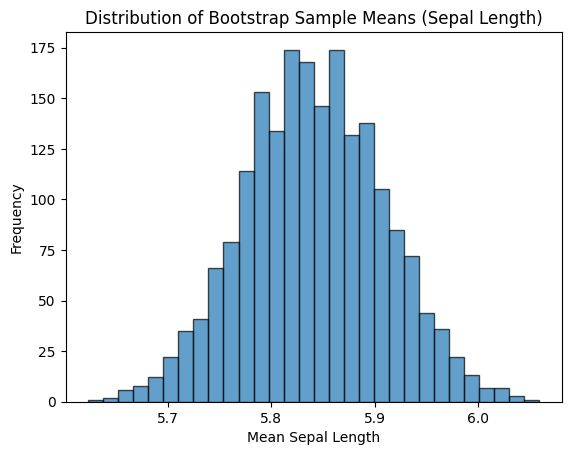

In [ ]:
plt.hist(bootstrap_means, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Bootstrap Sample Means (Sepal Length)')
plt.xlabel('Mean Sepal Length')
plt.ylabel('Frequency')
plt.show()